# Import required Libraries

In [30]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import naive_bayes, svm
import random
import warnings
import string
import numpy as np
warnings.filterwarnings("ignore")
from sklearn.utils import shuffle
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
import re
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_curve, f1_score, roc_auc_score
from matplotlib import pyplot

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Reading data

In [31]:
#dataset1
dataset1 = pd.read_csv('train.csv')
dataset1.text = dataset1.text.astype(str)

#dataset2
df_fake = pd.read_csv('Fake.csv')
df_fake.insert(4,'label',0)
df_true = pd.read_csv('True.csv')
df_true.insert(4,'label',1)
frames=[df_fake,df_true]
dataset2=pd.concat(frames)
dataset2=shuffle(dataset2)
dataset2.reset_index(inplace=True)

#dataset3
dataset3 = pd.read_csv('train.csv')
dataset3.text = dataset3.text.astype(str)

# ********Data Preparation********

# Data cleaning

In [32]:
#dataset1
dataset1.drop(['title'],axis=1,inplace=True)
dataset1.drop(['author'],axis=1,inplace=True)

#dataset2
dataset2.drop(["date"],axis=1,inplace=True)
dataset2.drop(["title"],axis=1,inplace=True)

#dataset3 imbalanced
dataset3.drop(['title'],axis=1,inplace=True)
dataset3.drop(['author'],axis=1,inplace=True)

In [33]:
#make dataset2 imbalanced
data_t = dataset3.loc[(dataset3['label']==1)]
data_f = dataset3.loc[(dataset3['label']==0)]

data_t.reset_index(inplace=True)
data_f.reset_index(inplace = True)
data_t.drop(labels=['index'],axis=1,inplace=True)
data_f.drop(labels=['index'],axis=1,inplace=True)

data_f.drop(labels=range(1500,10000),axis=0,inplace=True)
# data_f.drop(labels=range(3400,3900),axis=0,inplace=True)
# data_f.drop(labels=range(4200,8800),axis=0,inplace=True)

frame=[data_t,data_f]
dataset3=pd.concat(frame)
dataset3=shuffle(dataset3)
dataset3.reset_index(inplace=True)
dataset3.drop(labels=['index'],axis=1,inplace=True)

In [34]:
#dataset1
dataset1['text'].dropna(inplace = True)

#dataset2
dataset2['text'].dropna(inplace=True)
# data['text'].isnull().any().sum()

#dataset3
dataset3['text'].dropna(inplace = True)

In [35]:
#remove panctuations and convert text to lowercase

def data_cleaning(text):
    #text=tostring(text)
    text = text.lower()
    wordList = [word for word in text if word not in string.punctuation]
    clean_str = ''.join(wordList)
    return clean_str

In [36]:
#dataset1
dataset1['text'] = dataset1['text'].apply(data_cleaning)

#dataset2
dataset2['text'] = dataset2['text'].apply(data_cleaning)

#dataset3
dataset3['text'] = dataset3['text'].apply(data_cleaning)

In [37]:
# #remove stopwords
# #print(stopwords.fileids())
# stop_words = stopwords.words('english')

# def remove_stop_words(text):
#     wordlist = list()
#     split_words = re.sub('[^a-zA-Z0-9 ]','',text).split()
#     wordlist = [stemmer.stem(word) for word in split_words]
#     wordlist = [word for word in wordlist if not word in stop_words]
#     finalstr= ' '.join(wordlist)
#     return finalstr

In [38]:
# #dataset1
# dataset1['text'] = dataset1['text'].apply(remove_stop_words)

# #dataset3
# data['text']=data['text'].apply(remove_stop_words)

# Data Visualization

label
0    10387
1    10413
Name: text, dtype: int64


<AxesSubplot:xlabel='label'>

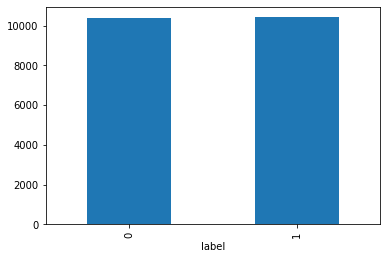

In [39]:
#dataset1
print(dataset1.groupby(['label'])['text'].count()) #0-fake 1-true
dataset1.groupby(['label'])['text'].count().plot(kind='bar')

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


<AxesSubplot:xlabel='subject'>

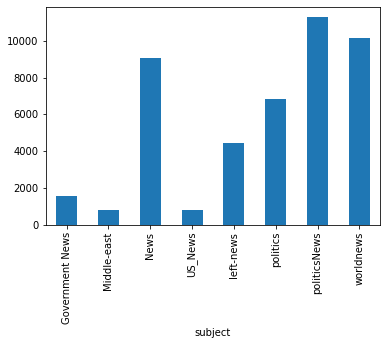

In [40]:
#dataset2
print(dataset2.groupby(['subject'])['text'].count())
dataset2.groupby(['subject'])['text'].count().plot(kind='bar')

label
0    23481
1    21417
Name: text, dtype: int64


<AxesSubplot:xlabel='label'>

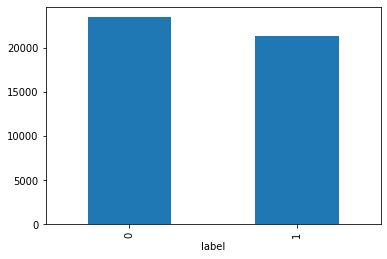

In [41]:
#dataset2
print(dataset2.groupby(['label'])['text'].count()) #0-fake 1-true
dataset2.groupby(['label'])['text'].count().plot(kind='bar')

label
0     1887
1    10413
Name: text, dtype: int64


<AxesSubplot:xlabel='label'>

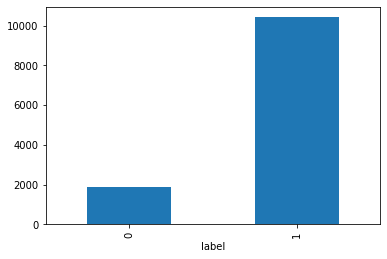

In [42]:
#dataset3
print(dataset3.groupby(['label'])['text'].count())
dataset3.groupby(['label'])['text'].count().plot(kind='bar')

# Train Test split

In [43]:
# dataset1
x1_train,x1_validate,y1_train,y1_validate = train_test_split(dataset1['text'],dataset1['label'],test_size=0.2,random_state=1000)

In [44]:
#dataset2
x2_train,x2_validate,y2_train,y2_validate = train_test_split(dataset2['text'],dataset2['label'],test_size=0.2,random_state=1000)

In [45]:
#dataset3
x3_train,x3_validate,y3_train,y3_validate = train_test_split(dataset3['text'],dataset3['label'],test_size=0.2,random_state=1000)

In [46]:
count_0 =count_1= 0

for i in range (1,y3_validate.count()):
    if y3_validate.iloc[i] == 1:
        count_1+=1
    else:
        count_0+=1

print("label 0 count in imabalced dataset is %d",count_0)
print("label 1 count in imabalced dataset is %d",count_1)

label 0 count in imabalced dataset is %d 381
label 1 count in imabalced dataset is %d 2078


# Required Menthods

# Confusion Matrix display method

In [47]:
def display_confusion_matrix(y_validate,pred):
    confusion_mat = confusion_matrix(y_validate,pred,labels=[1,0])
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=['True','False'])
    disp.plot()

# ROC AUC curve display method

In [48]:
def display_roc_auc(y_validate,prediction,model_name):
    # generate a no skill prediction (majority class)  
    ns_probs = [0 for _ in range(len(y_validate))]  #diagonal
    #calculate roc auc score
    ns_auc = roc_auc_score(y_validate,ns_probs)
    auc = roc_auc_score(y_validate,prediction)
    print('No skill  : ROC AUC = %.3f'%(ns_auc))
    print(model_name+': ROC AUC = %.3f'%(auc))
    ns_fpr,ns_tpr,ns_threshold = roc_curve(y_validate,ns_probs)
    fpr,tpr,thresholds = roc_curve(y_validate,prediction)
    pyplot.plot(ns_fpr,ns_tpr,marker='.',label='No Skill')
    pyplot.plot(fpr,tpr,marker='.',label=model_name)
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    pyplot.legend()
    pyplot.show()

# Naive Bayes method for max accuracy for alpha(smoothing) range

In [49]:
def max_accuracy_naive(vect_x_train,y_train,vect_x_validate,y_validate,x_validate,alpha_start,alpha_end):
    max_accuracy =req_alpha= 0
    naive_pred = np.array(x_validate.size)
    for x in range(100):
        alpha = random.uniform(alpha_start,alpha_end)
        naive=naive_bayes.MultinomialNB(alpha)
        naive.fit(vect_x_train,y_train)
        naive_pred=naive.predict(vect_x_validate)
        accuracy = accuracy_score(naive_pred, y_validate)*100
        if max_accuracy < accuracy:
            max_accuracy = accuracy
            req_alpha = alpha
    print("alpha value -> %f ",round(req_alpha,5))
    print("Naive Accuracy Score -> %f ",round(max_accuracy,2))
    return naive_pred

# [Part A] Vectorizing and applying bags of words (CountVectorizer)

In [50]:
#dataset1
vectorizer1 = CountVectorizer(stop_words='english',analyzer='word')

vectorizer1.fit(x1_train)
vect_x1_train = vectorizer1.transform(x1_train)
vect_x1_validate = vectorizer1.transform(x1_validate)

#dataset2
vectorizer2 = CountVectorizer(stop_words='english',analyzer='word')

vectorizer2.fit(x2_train)
vect_x2_train = vectorizer2.transform(x2_train)
vect_x2_validate = vectorizer2.transform(x2_validate)

#dataset3
vectorizer3 = CountVectorizer(stop_words='english',analyzer='word')

vectorizer3.fit(x3_train)
vect_x3_train = vectorizer3.transform(x3_train)
vect_x3_validate = vectorizer3.transform(x3_validate)


# [Part A - Model 1] PAC -> PassiveAggressive Classifier and Evaluation Methods

# PAC model and accuracy score Dataset1

In [220]:
#passiveaggressive classifier for dataset1
pac1=PassiveAggressiveClassifier(C=0.0001,random_state=5,max_iter=1000)
pac1.fit(vect_x1_train,y1_train)
#predict class
pac1_pred=pac1.predict(vect_x1_validate)
score= accuracy_score(y1_validate,pac1_pred)
print("PassiveAggressive Accuracy Score -> ",round(accuracy_score(pac1_pred, y1_validate)*100,2))

PassiveAggressive Accuracy Score ->  95.38


# Confusion matrix

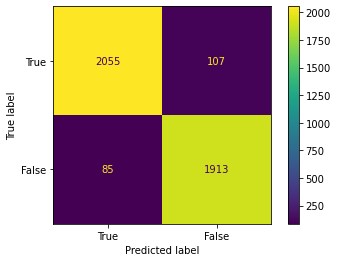

In [221]:
display_confusion_matrix(y1_validate,pac1_pred)

# ROC-AUC

No skill  : ROC AUC = 0.500
PassiveAggressive: ROC AUC = 0.954


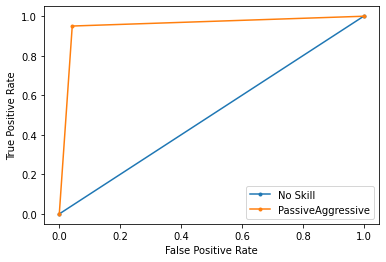

In [222]:
#passiveAggressive - dataset1
display_roc_auc(y1_validate,pac1_pred,'PassiveAggressive')

# F1-score

In [223]:
pac1_f1_Score = f1_score(y1_validate,pac1_pred)
print("PassiveAggressive : F1-score = %.3f "%pac1_f1_Score)

PassiveAggressive : F1-score = 0.955 


# PAC model and accuracy score - Dataset2

In [224]:
#for dataset2
pac2=PassiveAggressiveClassifier(C=1.0,random_state=5,max_iter=1000)
pac2.fit(vect_x2_train,y2_train)
pac2_pred=pac2.predict(vect_x2_validate)
score= accuracy_score(y2_validate,pac2_pred)
print("PassiveAggressive Accuracy Score -> ",round(accuracy_score(pac2_pred, y2_validate)*100,2))

PassiveAggressive Accuracy Score ->  99.23


# Confusion Matrix

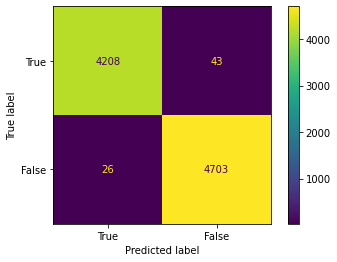

In [225]:
display_confusion_matrix(y2_validate,pac2_pred)

# ROC AUC curve

No skill  : ROC AUC = 0.500
PassiveAggressive: ROC AUC = 0.992


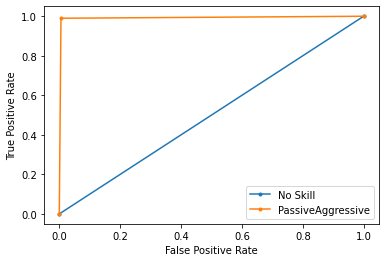

In [226]:
#passiveAggressive - dataset2
display_roc_auc(y2_validate,pac2_pred,'PassiveAggressive')

# F1-score

In [227]:
pac2_f1_Score = f1_score(y2_validate,pac2_pred)
print("PassiveAggressive : F1-score = %.3f "%pac2_f1_Score)

PassiveAggressive : F1-score = 0.992 


In [229]:
#dataset3 imbalanced
pac3=PassiveAggressiveClassifier(C=1.0,random_state=5,max_iter=1000)
pac3.fit(vect_x3_train,y3_train)
pac3_pred=pac3.predict(vect_x3_validate)
score= accuracy_score(y3_validate,pac3_pred)
print("PassiveAggressive Accuracy Score -> ",round(accuracy_score(pac3_pred, y3_validate)*100,2))
pac3_f1_Score = f1_score(y3_validate,pac3_pred)
print("PassiveAggressive : F1-score = %.3f "%pac3_f1_Score)

PassiveAggressive Accuracy Score ->  94.51
PassiveAggressive : F1-score = 0.968 


# [Part A - Model 2] NB -> Naive Bayes classifier and Evaluation Methods

# NB model and Accuracy score - Dataset1

In [230]:
#for dataset1
alpha_start = 0.00001 
alpha_end = 0.001
naive1_pred = max_accuracy_naive(vect_x1_train,y1_train,vect_x1_validate,y1_validate,x1_validate,alpha_start,alpha_end)

alpha value -> %f  0.00025
Naive Accuracy Score -> %f  93.53


# Confusion Matrix

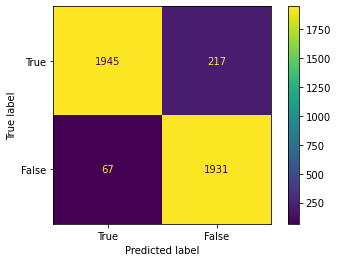

In [231]:
display_confusion_matrix(y1_validate,naive1_pred)

# ROC AUC curve

No skill  : ROC AUC = 0.500
Naive Bayes: ROC AUC = 0.933


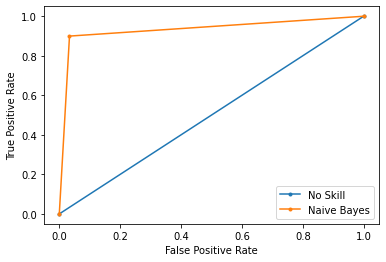

In [232]:
#Naive Bayes - dataset1
display_roc_auc(y1_validate,naive1_pred,'Naive Bayes')

# F1-Score

In [233]:
naive1_f1_Score = f1_score(y1_validate,naive1_pred)
print("Naive Bayes : F1-score = %.3f "%naive1_f1_Score)

Naive Bayes : F1-score = 0.932 


# NB model and Accuracy score - Dataset1 (alpha = 0.00001)

In [234]:
naive1=naive_bayes.MultinomialNB(alpha=0.00007)
naive1.fit(vect_x1_train,y1_train)
naive1_pred=naive1.predict(vect_x1_validate)
print("Naive Bayes Accuracy Score -> ",round(accuracy_score(naive1_pred, y1_validate)*100,2))

Naive Bayes Accuracy Score ->  93.41


# confusion matrix

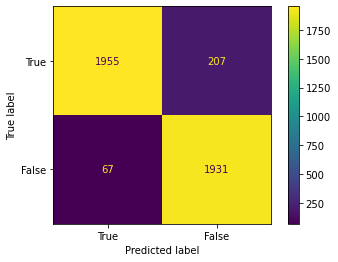

In [235]:
display_confusion_matrix(y1_validate,naive1_pred)

# ROC AUC curve

No skill  : ROC AUC = 0.500
Naive Bayes: ROC AUC = 0.935


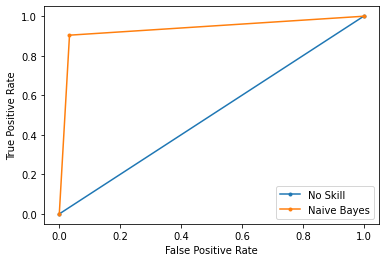

In [236]:
#Naive Bayes - dataset1
display_roc_auc(y1_validate,naive1_pred,'Naive Bayes')

# F1-score

In [237]:
naive1_f1_Score = f1_score(y1_validate,naive1_pred)
print("Naive Bayes : F1-score = %.3f "%naive1_f1_Score)

Naive Bayes : F1-score = 0.935 


# NB Model and Accuracy score - Dataset2

In [238]:
#naive bayes for dataset2
alpha_start = 0.00001 
alpha_end = 0.1
naive2_pred = max_accuracy_naive(vect_x2_train,y2_train,vect_x2_validate,y2_validate,x2_validate,alpha_start,alpha_end)

alpha value -> %f  0.00304
Naive Accuracy Score -> %f  96.84


# confusion matrics

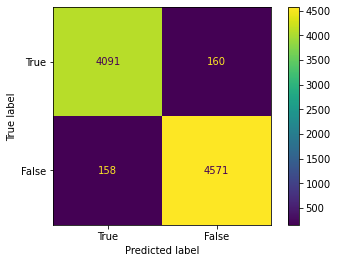

In [239]:
display_confusion_matrix(y2_validate,naive2_pred)

# ROC AUC curve

No skill  : ROC AUC = 0.500
Naive Bayes: ROC AUC = 0.964


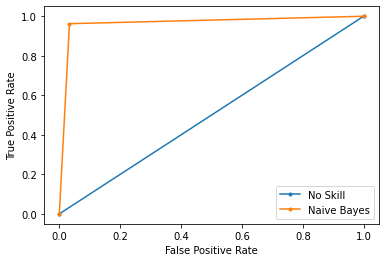

In [240]:
#Naive Bayes - dataset2
display_roc_auc(y2_validate,naive2_pred,'Naive Bayes')

# F1-Score

In [241]:
naive2_f1_Score = f1_score(y2_validate,naive2_pred)
print("Naive Bayes : F1-score = %.3f "%naive2_f1_Score)

Naive Bayes : F1-score = 0.963 


# NB model and Accuracy score - Dataset2 (alpha - 0.0001)

In [242]:
naive2=naive_bayes.MultinomialNB(alpha=0.0001)
naive2.fit(vect_x2_train,y2_train)
naive2_pred=naive2.predict(vect_x2_validate)
print("Naive Bayes Accuracy Score -> ",round(accuracy_score(naive2_pred, y2_validate)*100,2))

Naive Bayes Accuracy Score ->  97.03


# confusion matrics

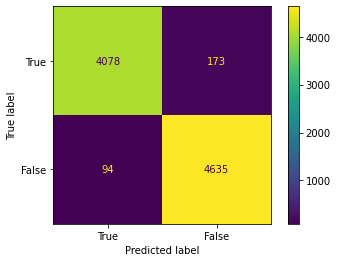

In [243]:
display_confusion_matrix(y2_validate,naive2_pred)

# ROC AUC

No skill  : ROC AUC = 0.500
Naive Bayes: ROC AUC = 0.970


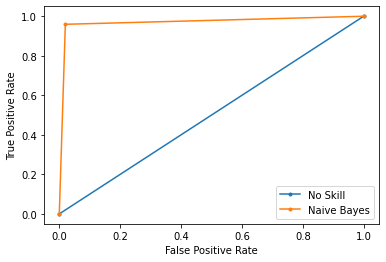

In [244]:
#Naive Bayes - dataset1
display_roc_auc(y2_validate,naive2_pred,'Naive Bayes')

# F1-score

In [245]:
naive2_f1_Score = f1_score(y2_validate,naive2_pred)
print("Naive Bayes : F1-score = %.3f "%naive2_f1_Score)

Naive Bayes : F1-score = 0.968 


In [246]:
#for dataset3
naive3=naive_bayes.MultinomialNB(alpha=0.00001)
naive3.fit(vect_x3_train,y3_train)
naive3_pred=naive3.predict(vect_x3_validate)
print("Naive Bayes Accuracy Score -> ",round(accuracy_score(naive3_pred, y3_validate)*100,2))
naive3_f1_Score = f1_score(y3_validate,naive3_pred)
print("Naive Bayes : F1-score = %.3f "%naive3_f1_Score)

Naive Bayes Accuracy Score ->  94.43
Naive Bayes : F1-score = 0.967 


# [Part A - Model3] LR - Logistic Regression Classifier and Evaluation Mathods

# LR model and accuracy score - dataset1

In [52]:
#for dataset1
lr1_model = LogisticRegression(solver='lbfgs',random_state=10,C=10.0) 
lr1_model.fit(vect_x1_train,y1_train)
lr1_pred=lr1_model.predict(vect_x1_validate)
print("logistic regression Accuracy Score -> ",round(accuracy_score(lr1_pred, y1_validate)*100,2))

logistic regression Accuracy Score ->  95.43


# confusion matrics

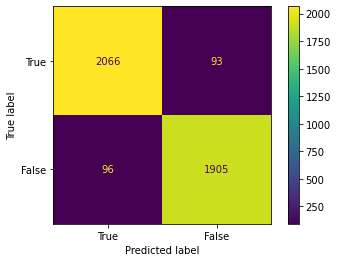

In [248]:
display_confusion_matrix(lr1_pred,y1_validate)

# ROC AUC

No skill  : ROC AUC = 0.500
Logistic Regression: ROC AUC = 0.955


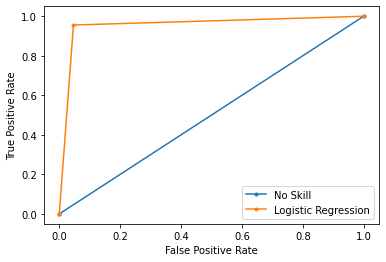

In [249]:
#Logistic Regression - dataset1
display_roc_auc(y1_validate,lr1_pred,'Logistic Regression')

# F1-score

In [250]:
lr1_f1_Score = f1_score(y1_validate,lr1_pred)
print("Logistic Regression : F1-score = %.3f "%lr1_f1_Score)

Logistic Regression : F1-score = 0.956 


# LR model and accuracy score - Dataset2

In [56]:
#for dataset2
lr2_model = LogisticRegression(solver='liblinear',random_state=10,C=1.0)
lr2_model.fit(vect_x2_train,y2_train)
lr2_pred=lr2_model.predict(vect_x2_validate)
print("logistic regression Accuracy Score -> ",round(accuracy_score(lr2_pred, y2_validate)*100,2))

logistic regression Accuracy Score ->  99.55


# Confusion Matrics

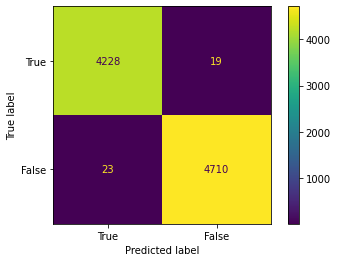

In [252]:
display_confusion_matrix(lr2_pred,y2_validate)

# ROC AUC

No skill  : ROC AUC = 0.500
Logistic Regression: ROC AUC = 0.995


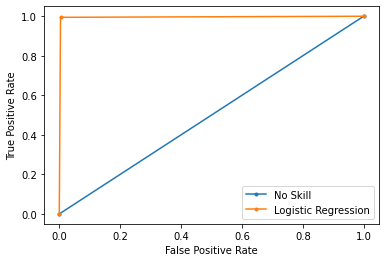

In [253]:
#Logistic Regression - dataset2
display_roc_auc(y2_validate,lr2_pred,'Logistic Regression')

# F1-score

In [254]:
lr2_f1_Score = f1_score(y2_validate,lr2_pred)
print("PassiveAggressive : F1-score = %.3f "%lr2_f1_Score)

PassiveAggressive : F1-score = 0.995 


logistic regression Accuracy Score ->  96.59
PassiveAggressive : F1-score = 0.980 


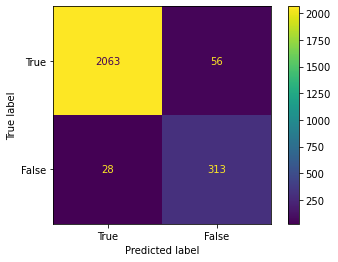

In [261]:
#for dataset3
lr3_model = LogisticRegression(solver='liblinear',random_state=10,C=1.0) 
lr3_model.fit(vect_x3_train,y3_train)
lr3_pred=lr3_model.predict(vect_x3_validate)
print("logistic regression Accuracy Score -> ",round(accuracy_score(lr3_pred, y3_validate)*100,2))
lr3_f1_Score = f1_score(y3_validate,lr3_pred)
print("PassiveAggressive : F1-score = %.3f "%lr3_f1_Score)
display_confusion_matrix(lr3_pred,y3_validate)

# [Part A - Model 4] SVM - Support Vector Machine and model evaluation

# SVM model and accuracy score - dataset1

In [108]:
#for dataset1
SVM1=svm.SVC(C=0.1,kernel='linear',cache_size=800)
SVM1.fit(vect_x1_train,y1_train)
svm1_pred=SVM1.predict(vect_x1_validate)
print("SVM Accuracy Score -> ",round(accuracy_score(svm1_pred, y1_validate)*100,2))

SVM Accuracy Score ->  94.78


# confusion matrics

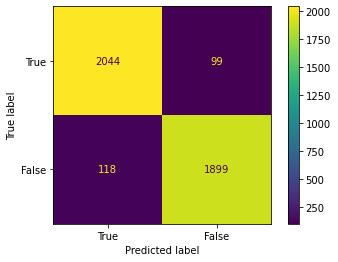

In [109]:
display_confusion_matrix(svm1_pred,y1_validate)

# ROC AUC

No skill  : ROC AUC = 0.500
SVM: ROC AUC = 0.948


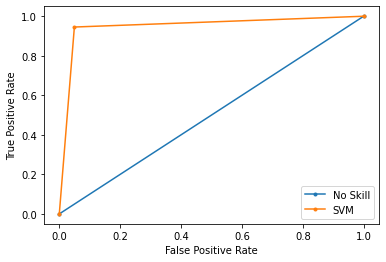

In [110]:
#SVM - dataset1
display_roc_auc(y1_validate,svm1_pred,'SVM')

# F1-Score

In [111]:
svm1_f1_Score = f1_score(y1_validate,svm1_pred)
print("SVM : F1-score = %.3f "%svm1_f1_Score)

SVM : F1-score = 0.950 


# SVM model and accuracy score - dataset2

In [ ]:
#for dataset2
SVM2=svm.SVC(C=1.0,kernel='linear',cache_size=800)
SVM2.fit(vect_x2_train,y2_train)
svm2_pred=SVM2.predict(vect_x2_validate)
print("SVM Accuracy Score -> ",round(accuracy_score(svm2_pred, y2_validate)*100,2))

# confusion matrics

In [ ]:
display_confusion_matrix(svm2_pred,y2_validate)

# ROC AUC

In [ ]:
#SVM - dataset2
display_roc_auc(y2_validate,svm2_pred,'SVM')

# F1-score

In [ ]:
svm2_f1_Score = f1_score(y2_validate,svm2_pred)
print("SVM : F1-score = %.3f "%svm2_f1_Score)

In [257]:
#for dataset3
SVM3=svm.SVC(C=1.0,kernel='linear',cache_size=800)
SVM3.fit(vect_x3_train,y3_train)
svm3_pred=SVM3.predict(vect_x3_validate)
print("SVM Accuracy Score -> ",round(accuracy_score(svm3_pred, y3_validate)*100,2))
svm3_f1_Score = f1_score(y3_validate,svm3_pred)
print("SVM : F1-score = %.3f "%svm3_f1_Score)

SVM Accuracy Score ->  96.1
SVM : F1-score = 0.977 


# Part B - Vectorizing and applying TF-IDF

In [58]:
#dataset1
tfidf_vectorizer1 = TfidfVectorizer(stop_words='english',analyzer='word',max_df=0.8)
tfidf1_train = tfidf_vectorizer1.fit_transform(x1_train)
tfidf1_validate =tfidf_vectorizer1.transform(x1_validate)

#dataset2
tfidf_vectorizer2 = TfidfVectorizer(stop_words='english',analyzer='word',max_df=0.8)
tfidf2_train = tfidf_vectorizer2.fit_transform(x2_train)
tfidf2_validate=tfidf_vectorizer2.transform(x2_validate)
# print(tfidf_vectorizer.vocabulary_)
# print(tfidf_train)

#dataset3
tfidf_vectorizer3 = TfidfVectorizer(stop_words='english',analyzer='word',max_df=0.8)
tfidf3_train = tfidf_vectorizer3.fit_transform(x3_train)
tfidf3_validate=tfidf_vectorizer3.transform(x3_validate)

# [Part B-Model1] PAC - PassiveAggressive Classifier

# PAC model and accuracy score - Dataset1

In [263]:
#passiveaggressive classifier for dataset1
pac1=PassiveAggressiveClassifier(C=1.0,random_state=5,max_iter=1000)
pac1.fit(tfidf1_train,y1_train)
pac1_pred=pac1.predict(tfidf1_validate)
score= accuracy_score(y1_validate,pac1_pred)
print("PassiveAggressive Accuracy Score -> ",round(accuracy_score(pac1_pred, y1_validate)*100,2))

PassiveAggressive Accuracy Score ->  96.23


# confusion matrix

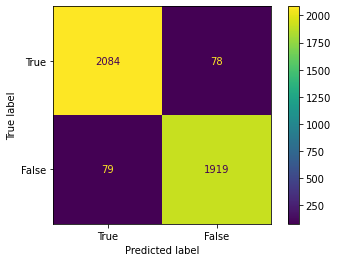

In [264]:
display_confusion_matrix(y1_validate,pac1_pred)

# ROC AUC

No skill  : ROC AUC = 0.500
PassiveAggressive: ROC AUC = 0.962


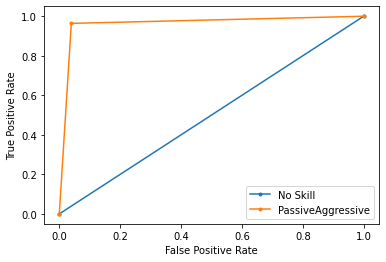

In [265]:
display_roc_auc(y1_validate,pac1_pred,'PassiveAggressive')

# F1-score

In [266]:
pac1_f1_Score = f1_score(y1_validate,pac1_pred)
print("PassiveAggressive : F1-score = %.3f "%pac1_f1_Score)

PassiveAggressive : F1-score = 0.964 


# PAC model and accuracy score - dataset2

In [267]:
#passiveaggressive classifier for dataset2
pac2=PassiveAggressiveClassifier(C=0.001,random_state=5,max_iter=1000)
pac2.fit(tfidf2_train,y2_train)
pac2_pred=pac2.predict(tfidf2_validate)
score= accuracy_score(y2_validate,pac2_pred)
print("PassiveAggressive Accuracy Score -> ",round(accuracy_score(pac2_pred, y2_validate)*100,2))

PassiveAggressive Accuracy Score ->  97.69


# confusion matrix

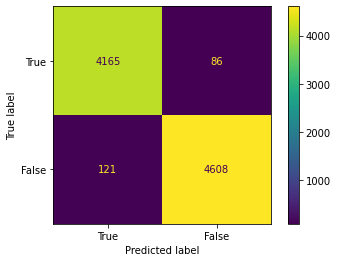

In [268]:
display_confusion_matrix(y2_validate,pac2_pred)

# ROC AUC

No skill  : ROC AUC = 0.500
PassiveAggressive: ROC AUC = 0.977


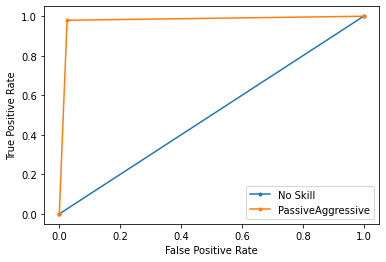

In [269]:
display_roc_auc(y2_validate,pac2_pred,'PassiveAggressive')

# F1-score

In [270]:
pac2_f1_Score = f1_score(y2_validate,pac2_pred)
print("PassiveAggressive : F1-score = %.3f "%pac2_f1_Score)

PassiveAggressive : F1-score = 0.976 


In [272]:
#dataset3 imbalanced
pac3=PassiveAggressiveClassifier(C=1.0,random_state=5,max_iter=1000)
pac3.fit(tfidf3_train,y3_train)
pac3_pred=pac3.predict(tfidf3_validate)
score= accuracy_score(y3_validate,pac3_pred)
print("PassiveAggressive Accuracy Score -> ",round(accuracy_score(pac3_pred, y3_validate)*100,2))
pac3_f1_Score = f1_score(y3_validate,pac3_pred)
print("PassiveAggressive : F1-score = %.3f "%pac3_f1_Score)

PassiveAggressive Accuracy Score ->  96.99
PassiveAggressive : F1-score = 0.982 


# [Part B - Model2] NB - Naive Bayes Classifier and model evaluation

# NB model and accuracy score for dataset1

In [ ]:
#for dataset1
alpha_start = 0.00001 
alpha_end = 0.01
naive1_pred = max_accuracy_naive(tfidf1_train,y1_train,tfidf1_validate,y1_validate,x1_validate,alpha_start,alpha_end)

# confusion matrix

In [ ]:
display_confusion_matrix(y1_validate,naive1_pred)

# ROC AUC

In [ ]:
#Naive Bayes - dataset1
display_roc_auc(y1_validate,naive1_pred,'Naive Bayes')

# F1-score

In [ ]:
naive1_f1_Score = f1_score(y1_validate,naive1_pred)
print("Naive Bayes : F1-score = %.3f "%naive1_f1_Score)

# NB model and accuracy score for dataset1 (alpha = 0.0025)

In [ ]:
naive1=naive_bayes.MultinomialNB(alpha=0.00007)
naive1.fit(tfidf1_train,y1_train)
naive1_pred=naive1.predict(tfidf1_validate)
print("Naive Bayes Accuracy Score -> ",round(accuracy_score(naive1_pred, y1_validate)*100,2))

# confusion matrix

In [ ]:
display_confusion_matrix(y1_validate,naive1_pred)

# ROC AUC

In [ ]:
display_roc_auc(y1_validate,naive1_pred,'Naive Bayes')

# F1-score

In [ ]:
naive1_f1_Score = f1_score(y1_validate,naive1_pred)
print("Naive Bayes : F1-score = %.3f "%naive1_f1_Score)

# NB model and accuracy score for dataset2

In [ ]:
#for dataset2
alpha_start = 0.00001 
alpha_end = 0.1
naive2_pred = max_accuracy_naive(tfidf2_train,y2_train,tfidf2_validate,y2_validate,x2_validate,alpha_start,alpha_end)

# confusion metrix

In [ ]:
display_confusion_matrix(y2_validate,naive2_pred)

# ROC AUC

In [ ]:
display_roc_auc(y2_validate,naive2_pred,'Naive Bayes')

# F1-score

In [ ]:
naive2_f1_Score = f1_score(y2_validate,naive2_pred)
print("Naive Bayes : F1-score = %.3f "%naive2_f1_Score)

# NB model and accuracy score - dataset2 (alpha = 0.0001)

In [ ]:
naive2=naive_bayes.MultinomialNB(alpha=0.0001)
naive2.fit(tfidf2_train,y2_train)
naive2_pred=naive2.predict(tfidf2_validate)
print("Naive Bayes Accuracy Score -> ",round(accuracy_score(naive2_pred, y2_validate)*100,2))

# confusion matrix

In [ ]:
display_confusion_matrix(y2_validate,naive2_pred)

# ROC AUC 

In [ ]:
display_roc_auc(y2_validate,naive2_pred,'Naive Bayes')

# F1-score

In [ ]:
naive2_f1_Score = f1_score(y2_validate,naive2_pred)
print("Naive Bayes : F1-score = %.3f "%naive2_f1_Score)

In [273]:
naive3=naive_bayes.MultinomialNB(alpha=0.00007)
naive3.fit(tfidf3_train,y3_train)
naive3_pred=naive3.predict(tfidf3_validate)
print("Naive Bayes Accuracy Score -> ",round(accuracy_score(naive3_pred, y3_validate)*100,2))
naive3_f1_Score = f1_score(y3_validate,naive3_pred)
print("Naive Bayes : F1-score = %.3f "%naive3_f1_Score)

Naive Bayes Accuracy Score ->  93.86
Naive Bayes : F1-score = 0.965 


# [Part B - Model3] LR - Logistic Regression classifier and Model Evaluation

# LR model and accuracy score - dataset1

In [67]:
#for dataset1
lr1_model = LogisticRegression(solver='liblinear',random_state=10,C=0.01)
lr1_model.fit(tfidf1_train,y1_train)
lr1_pred=lr1_model.predict(tfidf1_validate)
print("logistic regression Accuracy Score -> ",round(accuracy_score(lr1_pred, y1_validate)*100,2))

logistic regression Accuracy Score ->  88.44


# Confusion Matrix

In [ ]:
display_confusion_matrix(lr1_pred,y1_validate)

# ROC AUC

In [ ]:
display_roc_auc(y1_validate,lr1_pred,'Logistic Regression')

# F1-score

In [ ]:
lr1_f1_Score = f1_score(y1_validate,lr1_pred)
print("Logistic Regression : F1-score = %.3f "%lr1_f1_Score)

# LR model and accuracy score for dataset2

In [ ]:
#for dataset2
lr2_model = LogisticRegression(solver='liblinear',random_state=10,C=20.0)
lr2_model.fit(tfidf2_train,y2_train)
lr2_pred=lr2_model.predict(tfidf2_validate)
print("logistic regression Accuracy Score -> ",accuracy_score(lr2_pred, y2_validate)*100)

# Confusion matrix

In [ ]:
display_confusion_matrix(lr2_pred,y2_validate)

# ROC AUC

In [ ]:
display_roc_auc(y2_validate,lr2_pred,'Logistic Regression')

# F1-score

In [ ]:
lr2_f1_Score = f1_score(y2_validate,lr2_pred)
print("Logistic Regression : F1-score = %.3f "%lr2_f1_Score)

In [274]:
#for dataset3
lr3_model = LogisticRegression(solver='liblinear',random_state=10,C=20.0)
lr3_model.fit(tfidf3_train,y3_train)
lr3_pred=lr3_model.predict(tfidf3_validate)
print("logistic regression Accuracy Score -> ",accuracy_score(lr3_pred, y3_validate)*100)
lr3_f1_Score = f1_score(y3_validate,lr3_pred)
print("Logistic Regression : F1-score = %.3f "%lr3_f1_Score)

logistic regression Accuracy Score ->  96.01626016260163
Logistic Regression : F1-score = 0.977 


# [Part B - Model 4] Support Vector Machine - SVM Classifier and evaluation methods

# SVM and accuracy score for dataset1

In [61]:
#for dataset1
SVM1=svm.SVC(C=0.1,kernel='linear',cache_size=800)
SVM1.fit(tfidf1_train,y1_train)
svm1_pred=SVM1.predict(tfidf1_validate)
print("SVM Accuracy Score -> ",round(accuracy_score(svm1_pred, y1_validate)*100,2))

SVM Accuracy Score ->  93.51


# confusion matrix

In [ ]:
display_confusion_matrix(svm1_pred,y1_validate)

# ROC AUC

In [ ]:
display_roc_auc(y1_validate,svm1_pred,'SVM')

# F1-Score

In [ ]:
svm1_f1_Score = f1_score(y1_validate,svm1_pred)
print("SVM : F1-score = %.3f "%svm1_f1_Score)

# SVM and accuracy score - dataset2

In [64]:
#for dataset2
SVM2=svm.SVC(C=0.01,kernel='linear',cache_size=800)
SVM2.fit(tfidf2_train,y2_train)
svm2_pred=SVM2.predict(tfidf2_validate)
print("SVM Accuracy Score -> ",round(accuracy_score(svm2_pred, y2_validate)*100,2))

SVM Accuracy Score ->  95.42


# Confusion Matrix

In [ ]:
display_confusion_matrix(svm2_pred,y2_validate)

# ROC AUC

In [ ]:
display_roc_auc(y2_validate,svm2_pred,'SVM')

# F1-score

In [ ]:
svm2_f1_Score = f1_score(y2_validate,svm2_pred)
print("SVM : F1-score = %.3f "%svm2_f1_Score)

In [275]:
#for dataset3
SVM3=svm.SVC(C=1.0,kernel='linear',cache_size=800)
SVM3.fit(tfidf3_train,y3_train)
svm3_pred=SVM3.predict(tfidf3_validate)
print("SVM Accuracy Score -> ",accuracy_score(svm3_pred, y3_validate)*100)
svm3_f1_Score = f1_score(y3_validate,svm3_pred)
print("SVM : F1-score = %.3f "%svm3_f1_Score)

SVM Accuracy Score ->  96.26016260162602
SVM : F1-score = 0.978 
